## Import libs and network

In [34]:
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from networkx.algorithms.community import modularity
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Load the Karate Club graph
G = nx.karate_club_graph()
nodes = list(G.nodes())
num_nodes = len(nodes)

# Perform agglomerative hierarchical clustering with the modularity Q as a distance metric

In [35]:


def modularity_distance(G, node_i, node_j):
    """
    Compute a modularity-based distance metric between two nodes.
    """
    # Start with each node as its own community
    orig_partition = [{n} for n in G.nodes()]

    # Find the partitions containing node_i and node_j
    i_set = next(s for s in orig_partition if node_i in s)
    j_set = next(s for s in orig_partition if node_j in s)

    # If they are already in the same partition, distance is 0
    if i_set == j_set:
        return 0

    # Merge the communities containing node_i and node_j
    new_partition = [s for s in orig_partition if s not in [i_set, j_set]]  # Remove old sets
    merged_set = i_set | j_set  # Merge them
    new_partition.append(merged_set)  # Add merged set

    # Compute modularity values
    mod_before = modularity(G, orig_partition)
    mod_after = modularity(G, new_partition)

    # Convert modularity change into a distance metric
    mod_gain = mod_after - mod_before
    distance = 1 - mod_gain if mod_gain > 0 else 1 + abs(mod_gain)

    return distance

# Construct the distance matrix
distance_matrix = np.zeros((num_nodes, num_nodes))

for i, j in combinations(nodes, 2):
    d = modularity_distance(G, i, j)
    distance_matrix[i, j] = d
    distance_matrix[j, i] = d

# Set diagonal to 0 (distance to self is 0)
np.fill_diagonal(distance_matrix, 0)

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2,
                                         metric="precomputed",
                                         linkage="average")
labels_pred = agg_clustering.fit_predict(distance_matrix)



In [36]:
# Get ground truth labels (0 for "Mr. Hi", 1 for "Officer")
ground_truth_labels = np.array([0 if G.nodes[n]['club'] == 'Mr. Hi' else 1 for n in nodes])




In [37]:
labels_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
ground_truth_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Number of mismatches

In [41]:
sum(labels_pred != ground_truth_labels)

0

# Final report

Number of misplaced nodes: 0

All nodes classified correctly!


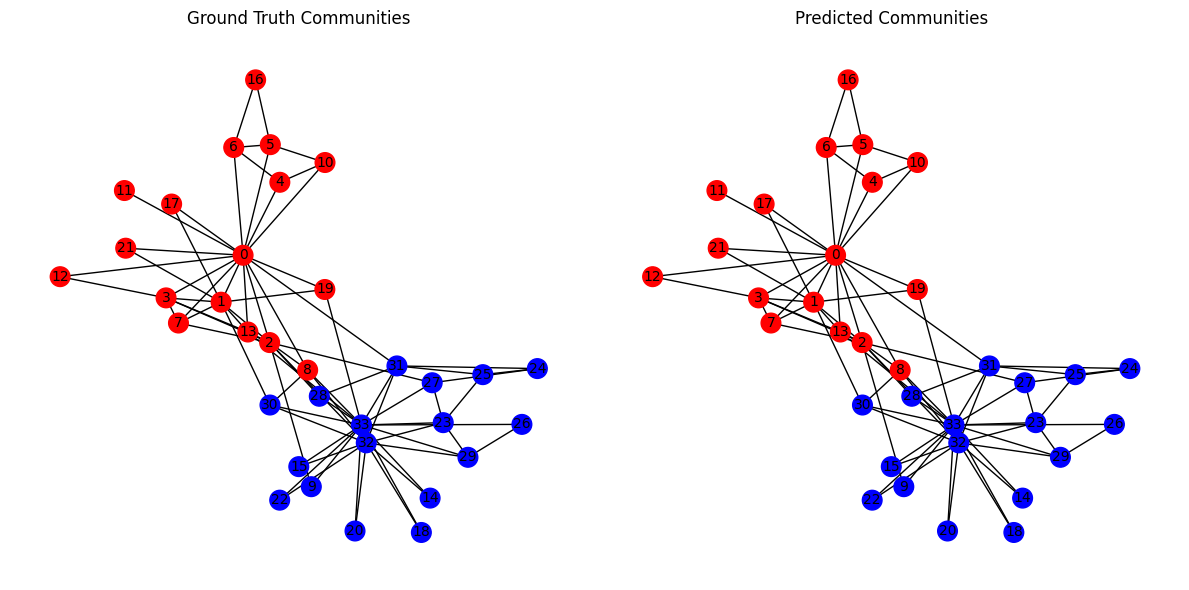


Summary:
- Adjusted Rand Index: 1.0000
- Number of misplaced nodes: 0
- Perfect classification achieved!


In [42]:


# Count misplaced nodes
mismatches = sum(labels_pred != ground_truth_labels)
print(f"Number of misplaced nodes: {mismatches}")

# Identify misplaced nodes
misclassified_nodes = [i for i in range(num_nodes) if labels_pred[i] != ground_truth_labels[i]]
if misclassified_nodes:
    print("\nMisclassified nodes:", misclassified_nodes)
else:
    print("\nAll nodes classified correctly!")

# Visualize the result
plt.figure(figsize=(12, 6))

# Original ground truth
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G, seed=42)  # For consistent layout
node_colors = ['r' if l == 0 else 'b' for l in ground_truth_labels]
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=200, font_size=10)
plt.title("Ground Truth Communities")

# Predicted communities
plt.subplot(1, 2, 2)
node_colors = ['r' if l == 0 else 'b' for l in labels_pred]
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=200, font_size=10)
plt.title("Predicted Communities")

plt.tight_layout()
plt.show()

# Final output summary
print("\nSummary:")
print(f"- Adjusted Rand Index: {ari_score:.4f}")
print(f"- Number of misplaced nodes: {mismatches}")
if mismatches > 0:
    print(f"- Misclassified nodes: {misclassified_nodes}")
else:
    print("- Perfect classification achieved!")